# Análise de Dados - UFPB

## Laboratório: Análise Exploratória de Dados

Utilizando os dados de séries do IMDB (_Internet Movie DataBase_) para fazer uma análise exploratória de dados de um seriado. Os dados estão no arquivo `/dados/avaliacao_episodios_series_top.csv`. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statistics import mode


# Substitua o filtro com o nome da série que você deseja analisar
episodios = (
    pd.read_csv('dados/avaliacao_episodios_series_top.csv')
    .query("nome_serie == 'The Walking Dead'")
)
episodios

,id_serie,nome_serie,id_episodio,temporada,num_episodio,nome_episodio,ano,generos,duracao_minutos,avaliacao_media,num_votos
7646,tt1520211,The Walking Dead,tt1589921,1.0,1.0,Days Gone Bye,2010,"Drama,Horror,Thriller",67.0,9.2,29347
7647,tt1520211,The Walking Dead,tt1628064,1.0,2.0,Guts,2010,"Drama,Horror,Thriller",45.0,8.6,18435
7648,tt1520211,The Walking Dead,tt1628065,1.0,3.0,Tell It to the Frogs,2010,"Drama,Horror,Thriller",45.0,8.2,16914
7649,tt1520211,The Walking Dead,tt1628066,1.0,4.0,Vatos,2010,"Drama,Horror,Thriller",44.0,8.5,16527
7650,tt1520211,The Walking Dead,tt1628067,1.0,5.0,Wildfire,2010,"Drama,Horror,Thriller",45.0,8.1,15893
...,...,...,...,...,...,...,...,...,...,...,...
7818,tt1520211,The Walking Dead,tt13062128,11.0,20.0,What's Been Lost,2022,"Drama,Horror,Thriller",43.0,7.3,5234
7819,tt1520211,The Walking Dead,tt13062130,11.0,21.0,Outpost 22,2022,"Drama,Horror,Thriller",48.0,7.2,5134
7820,tt1520211,The Walking Dead,tt13062132,11.0,22.0,Faith,2022,"Drama,Horror,Thriller",45.0,7.9,5685
7821,tt1520211,The Walking Dead,tt13062134,11.0,23.0,Family,2022,"Drama,Horror,Thriller",44.0,8.5,7393


## 1  Popularidade dos episódios
### 1.1 Qual a distribuição de votos que cada episódio teve?

Explore a popularidade de cada episódio analisando a quantidade de votos que cada um recebeu (`num_votos`). Exiba visualizações das distribuções e calcule estatísticas de centralidade e dispersão para esta variável.


In [2]:
media = np.mean(episodios['num_votos'])
mediana = np.median(episodios['num_votos'])
moda = mode(episodios['num_votos'])
variancia = np.var(episodios['num_votos'])
desvio_padrao = np.std(episodios['num_votos'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 12036.40
Mediana: 11978.0
Moda: 10479

Medidas de Dispersão:
Variância: 28084466.43
Desvio Padrão: 5299.48



As medidas de centralidade mostram que no geral a média, mediana e a moda estão próximas uma das outras, significando dizer que o número de votos estão bem agrupados nestes valores, entretanto, as medidas de dispersão estão bem elevadas, o que significa dizer que por mais que boa parte dos episódios possuam um número de votos próximos de 12000, também há muitos epidóios "fora da curva" em termos de popularidade, possuindo um número de votos muito acima da média. O Gráfico 1.1 demonstra quão bem agrupados os dados estão em volta dos 12000 votos e quão distante estão os episódios mais populares em comparação com a média.

#### Gráfico 1.1

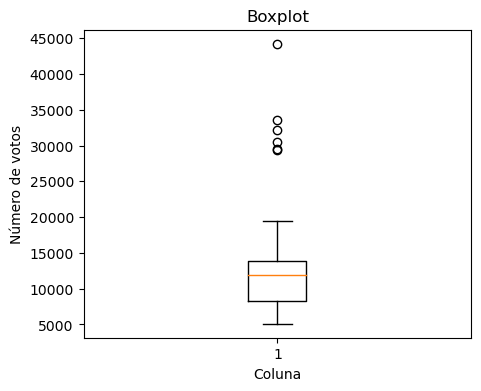

In [3]:
# INSIRA SEU CÓDIGO AQUI
fig, ax = plt.subplots(figsize=(5,4))
ax.boxplot(episodios['num_votos'])
ax.set_xlabel('Coluna')
ax.set_ylabel('Número de votos')
ax.set_title('Boxplot')
plt.show()

### 1.2 Qual o episódio mais popular (com mais votos)?

In [4]:
# INSIRA SEU CÓDIGO AQUI
episodios.sort_values(by="num_votos", ascending=False).head(1)

,id_serie,nome_serie,id_episodio,temporada,num_episodio,nome_episodio,ano,generos,duracao_minutos,avaliacao_media,num_votos
7729,tt1520211,The Walking Dead,tt5164772,7.0,1.0,The Day Will Come When You Won't Be,2016,"Drama,Horror,Thriller",46.0,9.2,44236


O primeiro episódio da sétima temporada, intitulado "The Day Will Como Whe You Won't Be", ou em português "Chegará o Dia em Que Você Não Agradecerá", é o mais popular de toda a série, possuindo 44236 votos, um valor muito acima do padrão da série.

### 1.3 Qual o episódio menos popular (com menos votos)?

In [5]:
# INSIRA SEU CÓDIGO AQUI
episodios.sort_values(by="num_votos").head(1)

,id_serie,nome_serie,id_episodio,temporada,num_episodio,nome_episodio,ano,generos,duracao_minutos,avaliacao_media,num_votos
7817,tt1520211,The Walking Dead,tt13062126,11.0,19.0,Variant,2022,"Drama,Horror,Thriller",49.0,7.2,5099


O primeiro episódio da sétima temporada, intitulado "Variant", ou em português "Variante", é o mais popular de toda a série, possuindo 5099 votos, um valor um pouco abaixo do padrão da série.

### 1.4 Qual a temporada mais popular?

In [6]:
# INSIRA SEU CÓDIGO AQUI
media_votos = episodios.groupby('temporada')['num_votos'].mean()
media_votos.sort_values(ascending=False)

temporada
1.0     19070.333333
6.0     15834.562500
2.0     14851.307692
4.0     14584.687500
5.0     14515.687500
7.0     14260.562500
3.0     13433.000000
8.0     10112.375000
9.0      9472.750000
10.0     8190.954545
11.0     6972.250000
Name: num_votos, dtype: float64

A primeira temporada  segue sendo a temporada mais popular, em seguida vêm a sexta e segunda temporada, completanto assim o top 3 temporadas mais populares. É possivel perceber um padrão na popularidade da série, a medida que as temporadas avançam sua popularidade caí, fazendo com que cada temporada tenha menos votos que a anterior, exceto em casos especiais, como na sexta, sétima e terceira temporada. O Gráfico 1.2 demonstra visualmente a queda de popularidade da série com o passar das temporadas.

#### Gráfico 1.2

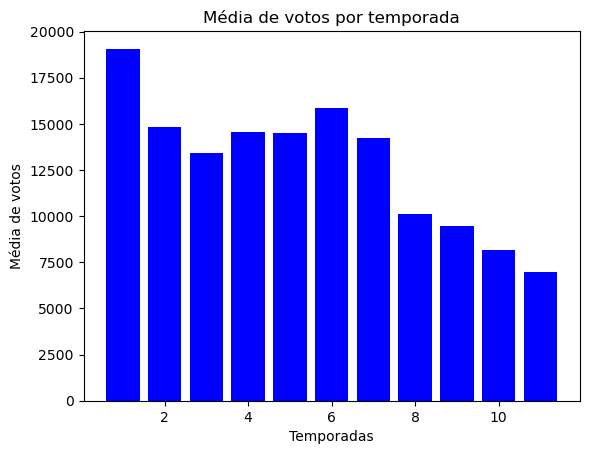

In [7]:
plt.bar(media_votos.index, media_votos.values, color='blue')

plt.xlabel('Temporadas')
plt.ylabel('Média de votos')
plt.title('Média de votos por temporada')
plt.show()

Apesar de algumas temporadas terem em média uma popularidade baixa, alguns de seus episódios possuem uma popularidade acima do padrão da série, como é o caso da sétima temporada que possui o episódio mais popular da série, porém possui uma média de popularidade baixa. O Gráfico 1.3 apresenta visualmente quão distoantes são estes episódios em comparação com a média de suas respectivas temporadas.

#### Gráfico 1.3

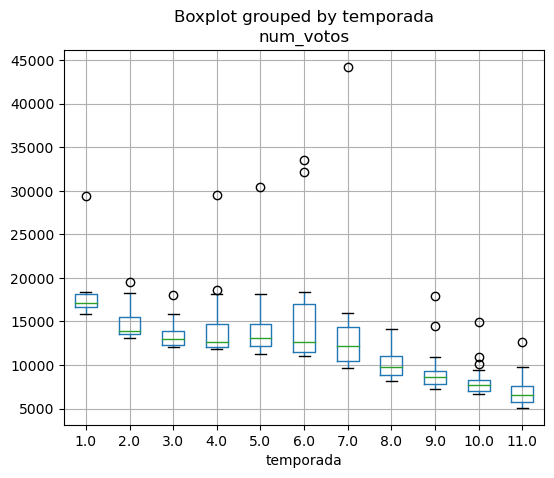

In [8]:
ax = episodios.boxplot(by='temporada',
  column='num_votos', figsize=(6, 5))

### 1.5 Qual a temporada menos popular?

In [9]:
# INSIRA SEU CÓDIGO AQUI
media_votos.sort_values().head(1)

temporada
11.0    6972.25
Name: num_votos, dtype: float64

Como foi visto anteriormente no subtópico 1.4, a popularidade da serie decaiu com o passar das temporadas. Sendo assim, a última temporada é a menos popular.

## 2 Qualidade dos episódios

### 2.1 Qual a distribuição de avaliações que cada episódio teve?

Explore a qualidade de cada episódio analisando a avaliação média que cada um recebeu (`avaliacao_media`). Exiba visualizações das distribuções e calcule estatísticas de centralidade e dispersão para esta variável.


In [10]:
media = np.mean(episodios['avaliacao_media'])
mediana = np.median(episodios['avaliacao_media'])
moda = mode(episodios['avaliacao_media'])
variancia = np.var(episodios['avaliacao_media'])
desvio_padrao = np.std(episodios['avaliacao_media'])

resultados = (
    "Medidas de Centralidade:\n"
    f"Média: {media:.2f}\n"
    f"Mediana: {mediana}\n"
    f"Moda: {moda}\n\n"
    "Medidas de Dispersão:\n"
    f"Variância: {variancia:.2f}\n"
    f"Desvio Padrão: {desvio_padrao:.2f}\n"
)
print(resultados)

Medidas de Centralidade:
Média: 7.91
Mediana: 7.9
Moda: 8.0

Medidas de Dispersão:
Variância: 0.66
Desvio Padrão: 0.81



As medidas de centralidade nos mostram que as avaliações recebidas pela série estão bem agrupadas em volta da sua média, possuindo uma mediana e moda quase igual ao valor da média. As medidas de dispersão evidenciam uma variância e desvio padrão moderados, sugerindo que não há uma grande dispersão de dados em volta da média. O Gráfico 2.1 expressa quão bem os dados estão agrupados em volta de sua mediana/média, contento apenas alguns poucos valores distantantes da média.

#### Gráfico 2.1

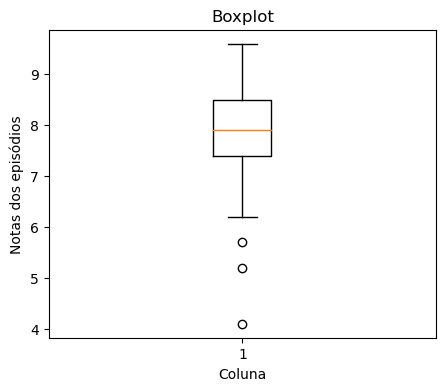

In [11]:
# INSIRA SEU CÓDIGO AQUI
fig, ax = plt.subplots(figsize=(5,4))
ax.boxplot(episodios['avaliacao_media'])
ax.set_xlabel('Coluna')
ax.set_ylabel('Notas dos episódios')
ax.set_title('Boxplot')
plt.show()

### 2.2 Qual o melhor episódio da série de acordo com as avaliações do IMDB?

In [12]:
# INSIRA SEU CÓDIGO AQUI
episodios.sort_values(by="avaliacao_media", ascending=False).head(1)

,id_serie,nome_serie,id_episodio,temporada,num_episodio,nome_episodio,ano,generos,duracao_minutos,avaliacao_media,num_votos
7697,tt1520211,The Walking Dead,tt3297776,5.0,1.0,No Sanctuary,2014,"Drama,Horror,Thriller",42.0,9.6,30449


O primeiro episódio da quinta temporada da série, entitulado é "No Sanctuary", ou "Sem Refúgio" em português, é o episódio com melhor avaliação em toda a série.


### 2.3 Qual o pior episódio da série de acordo com as avaliações do IMDB?

In [13]:
# INSIRA SEU CÓDIGO AQUI
episodios.sort_values(by="avaliacao_media").head(1)

,id_serie,nome_serie,id_episodio,temporada,num_episodio,nome_episodio,ano,generos,duracao_minutos,avaliacao_media,num_votos
7797,tt1520211,The Walking Dead,tt12772746,10.0,21.0,Diverged,2021,"Drama,Horror,Thriller",42.0,4.1,10916


O vigéssimo primeiro episódio da décima temporada da série, entitulado é "Divergent", ou "Divergido" em português, é o episódio com a pior avaliação em toda a série.

### 2.4 Qual a melhor temporada da série de acordo com as avaliações do IMDB?

In [14]:
# INSIRA SEU CÓDIGO AQUI
media_avaliacao = episodios.groupby('temporada')['avaliacao_media'].mean()
media_avaliacao.sort_values(ascending=False)

temporada
1.0     8.533333
3.0     8.356250
5.0     8.356250
2.0     8.353846
6.0     8.281250
4.0     8.256250
9.0     7.987500
11.0    7.754167
7.0     7.475000
10.0    7.386364
8.0     7.068750
Name: avaliacao_media, dtype: float64

A primeira temporada é a melhor de toda a série, seguida pela terceira e a quinta temporada, formando assim o top 3 temporadas mais bem avaliadas da série. É notório que no geral a avaliação das temporadas são bem próximas uma das outras, sem possuirem valores muito abaixo ou acima da média da série, demonstrando assim uma média de qualidade relativamente consistente. O Gráfico 2.2 evidencia essa baixa disparidade entre a avalições das temporadas.

#### Gráfico 2.2

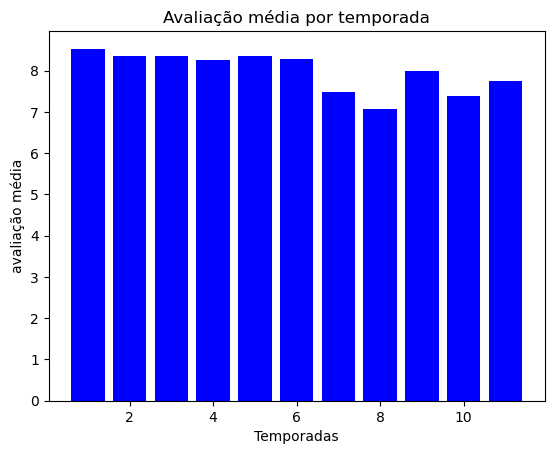

In [15]:
plt.bar(media_avaliacao.index, media_avaliacao.values, color='blue')

plt.xlabel('Temporadas')
plt.ylabel('avaliação média')
plt.title('Avaliação média por temporada')
plt.show()

No geral, todas as temporadas tem média de avaliação entre 7 e 8.5, entretanto, quase todas possuem variação nas notas de seus episódios, como no caso da décima temporada, que possui episódios tanto com nota acima de 9.0, quanto episódio com nota abaixo de 4.5, demonstrando possuir uma alta inconsistência nas avaliações de seus episódios. O Gráfico 2.3 apresenta visualmente esta variação entre a nota de alguns episódios e a média de avaliação de sua temporada.

#### Gráfico 2.3

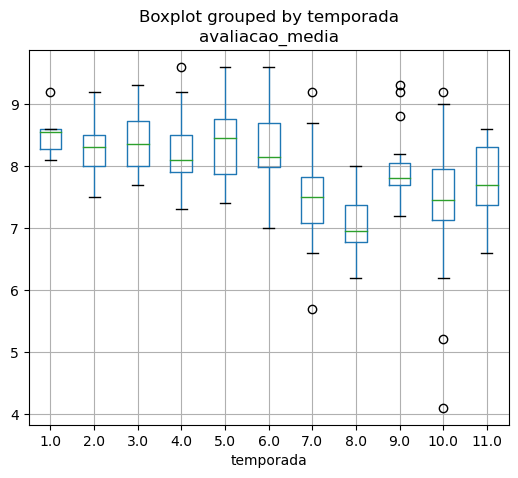

In [16]:
ax = episodios.boxplot(by='temporada',
  column='avaliacao_media', figsize=(6, 5))

### 2.5 Qual a pior temporada da série de acordo com as avaliações do IMDB?

In [17]:
# INSIRA SEU CÓDIGO AQUI
media_avaliacao.sort_values().head(1)

temporada
8.0    7.06875
Name: avaliacao_media, dtype: float64

A oitava temporada possui a pior avaliação dentre todas as temporadas, tendo uma avaliação média de 7.07

## 3 Relação entre variáveis

Analise a relação entre as variáveis referentes a cada episódio. Explore visualmente a relação entre elas e calcula estatísticas de correlação.

### 3.1 Existe alguma relação entre a quantidade de votos recebida e a avaliação média dos episódios?

#### Gráfico 3.1

c:\Users\bruns\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


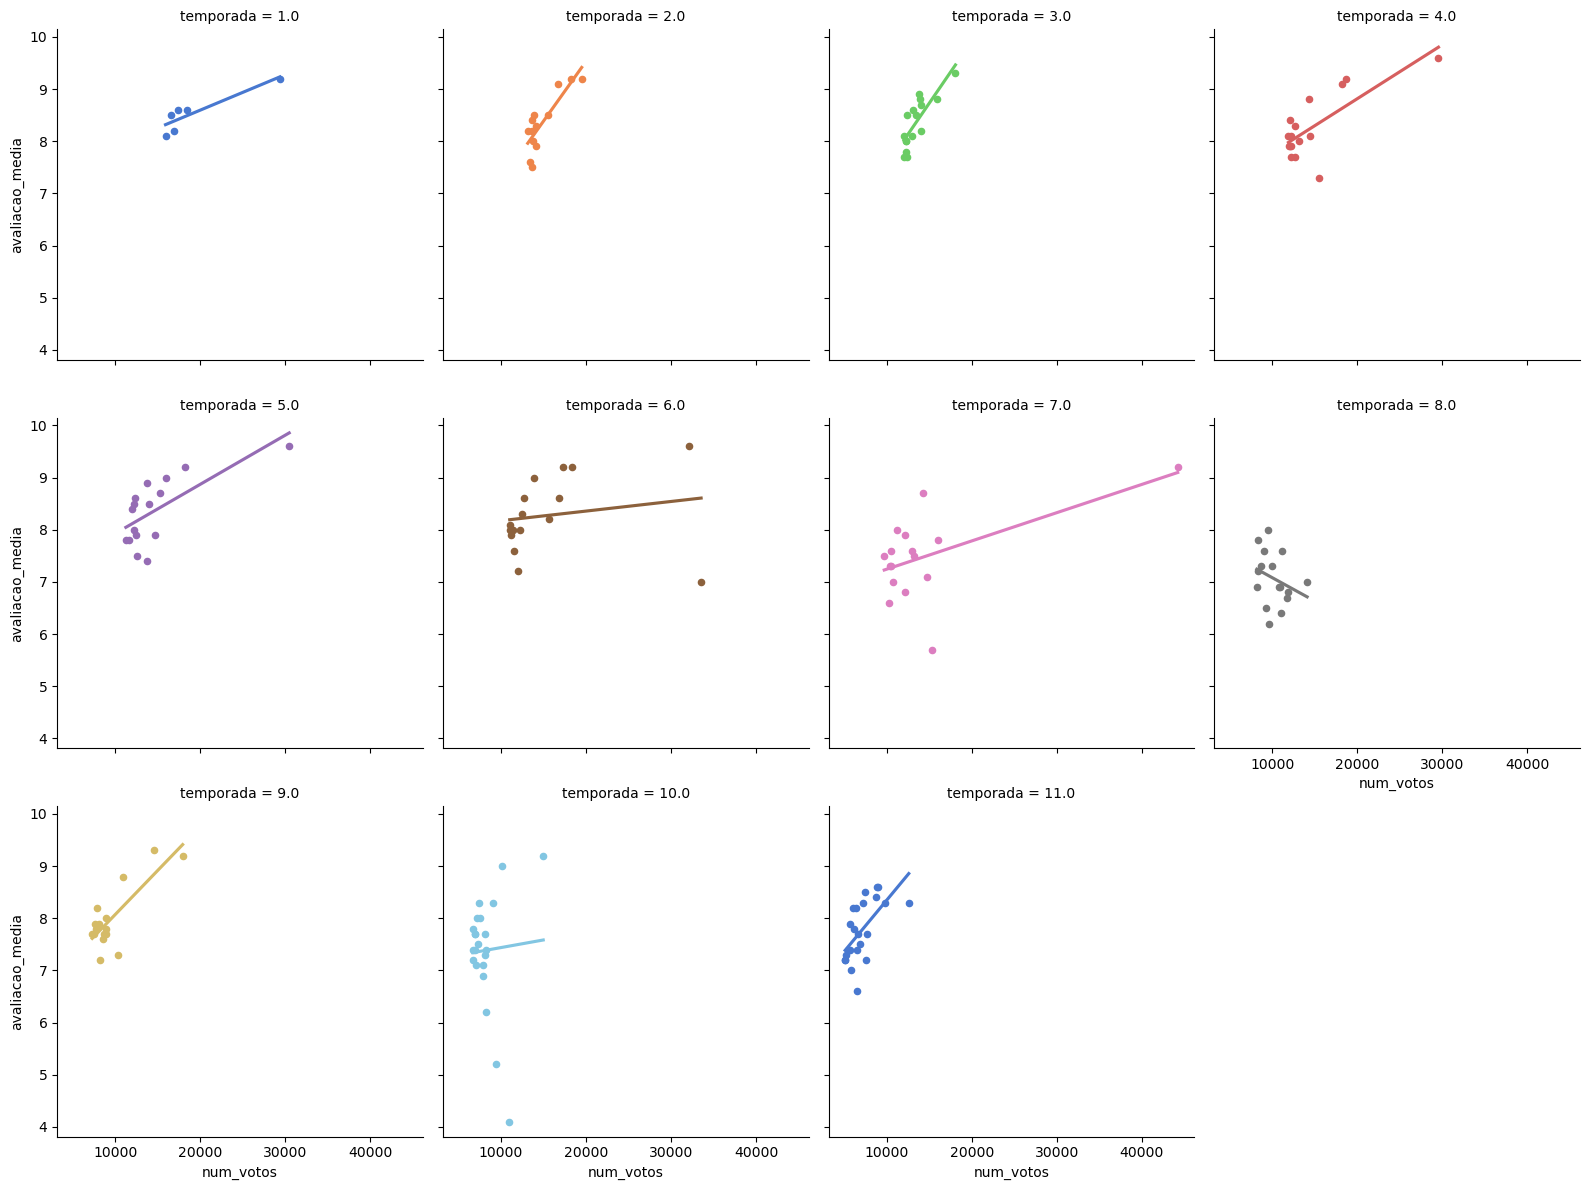

In [18]:
# INSIRA SEU CÓDIGO AQUI
sns.lmplot(
    data=episodios, x="num_votos", y="avaliacao_media", col="temporada", hue="temporada",
    col_wrap=4, palette="muted", ci=None,
    height=4, scatter_kws={"s": 20, "alpha": 1}
)


Anilisando linearmente, apenas algumas temporadas possuem uma fraca ou média correlação entre o número de votos e a avaliação média dos episódios, entretanto, é incorreto afirmar que não existe correlação entre estas variáveis apenas com esta análise. Tentaremos a seguir outros métodos de avaliar correlação e comparar os resultados com os atuais.

In [19]:
pd.Series({
    'pearson': episodios.num_votos.corr(episodios.num_episodio, method='pearson'),
    'spearman': episodios.num_votos.corr(episodios.num_episodio, method='spearman'),
    'kendall': episodios.num_votos.corr(episodios.num_episodio, method='kendall')
}, name='correlacao').to_frame()

,correlacao
pearson,-0.273824
spearman,-0.312906
kendall,-0.226519


Analisando os dados com outros métodos, é póssivel enxergar a correlação geral dos dados, sem separa-los por temporadas. Apartir das correlações Pearson, Kendall e Spearman chegamos aos seguintes resultados:

* A correlação Pearson indica uma correlação positiva fraca entre os dados, pois está entre 0.3 e 0.5;

* A correlação Spearman mostra que há uma correlação possitiva moderada entre os dados, pois estão entre 0.5 e 0.7;

* A correlação Kendall aponta uma média concordância entre as classificação das duas variáveis, pois seu valor está no meio de 0 e 1.

Em resumo é presumível que há uma correlação positiva entre as váriaveis, mesmo não sendo uma correlação forte.

### 3.2 Existe alguma relação entre a quantidade de votos recebida e o número do episódio?

#### Gráfico 3.2

c:\Users\bruns\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


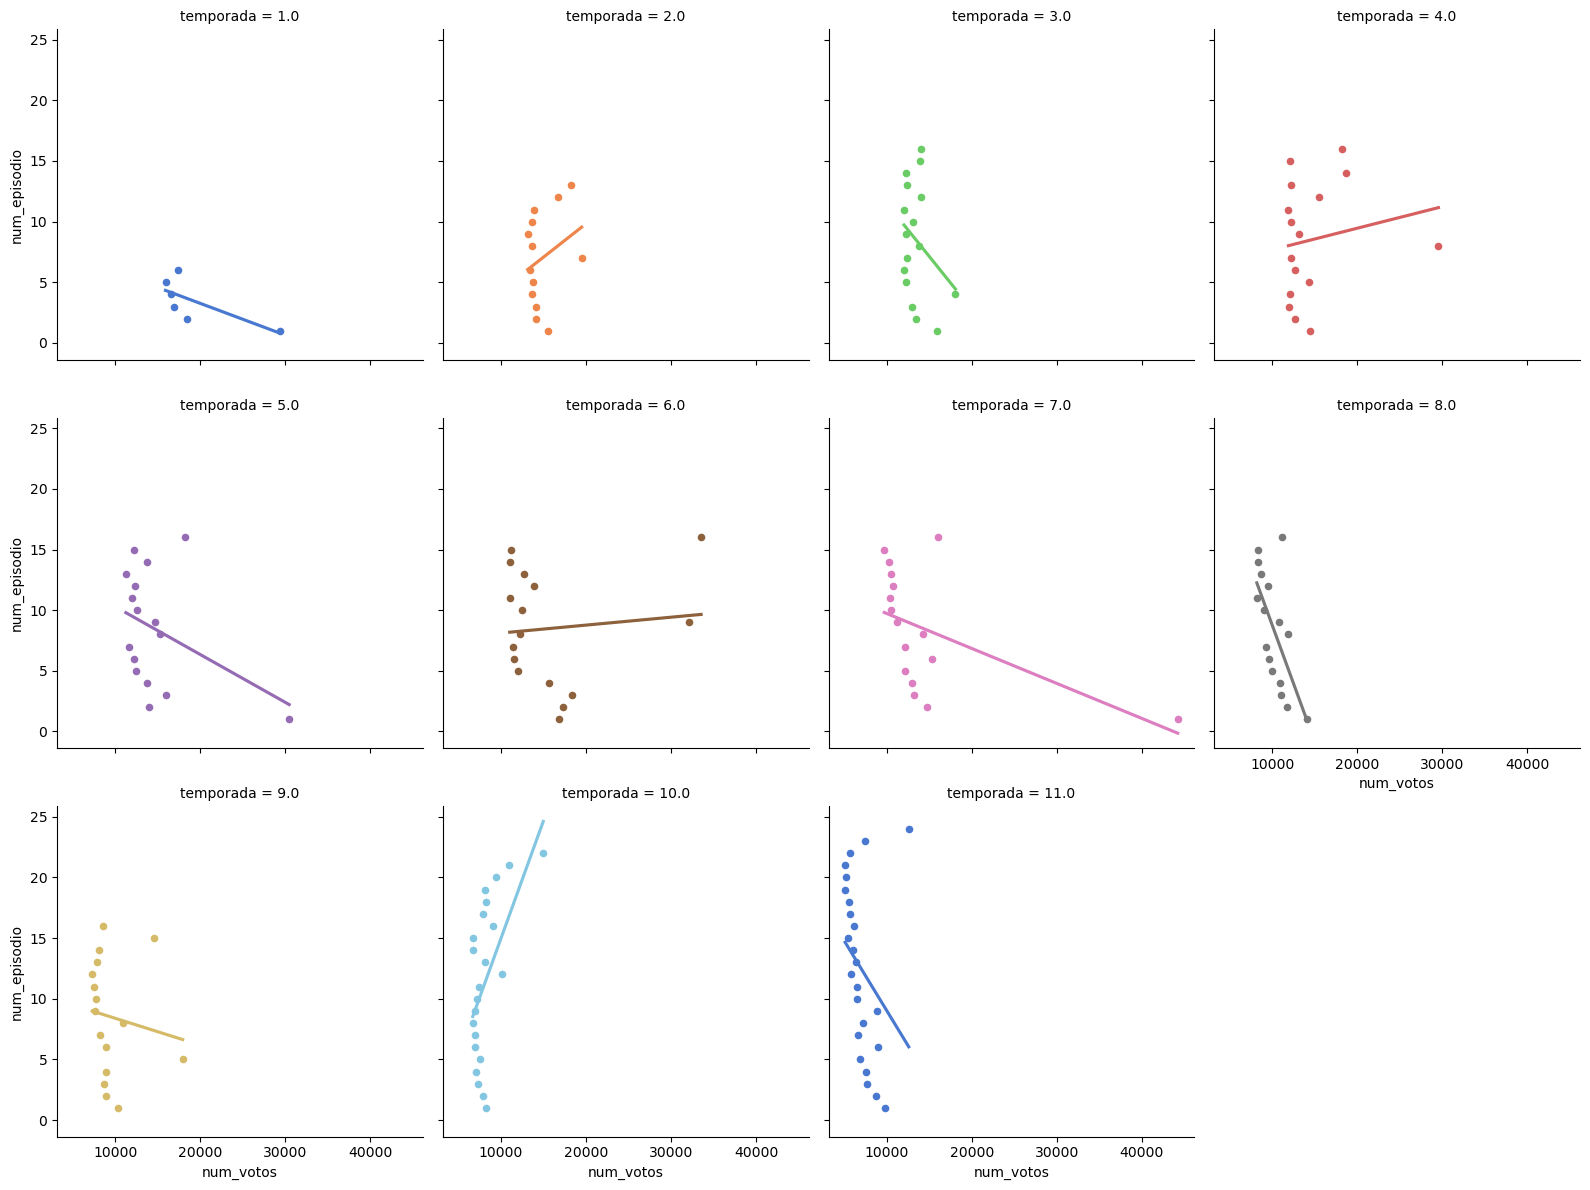

In [20]:
# INSIRA SEU CÓDIGO AQUI
sns.lmplot(
    data=episodios, x="num_votos", y="num_episodio", col="temporada", hue="temporada",
    col_wrap=4, palette="muted", ci=None,
    height=4, scatter_kws={"s": 20, "alpha": 1}
)

Utilizando a correlação linear, é notório apenas algumas temporadas seguem um padrão quanto ao número de episódio e seu número de votos e, ainda assim, as que seguem um padrão em sua tendem a possuir um correlação negativa, dando a entender quanto menor o número do episódio maior é sua avaliação.

In [21]:
pd.Series({
    'pearson': episodios.num_votos.corr(episodios.num_episodio, method='pearson'),
    'spearman': episodios.num_votos.corr(episodios.num_episodio, method='spearman'),
    'kendall': episodios.num_votos.corr(episodios.num_episodio, method='kendall')
}, name='correlacao').to_frame()

,correlacao
pearson,-0.273824
spearman,-0.312906
kendall,-0.226519


Utilizando-se de outros métodos, é póssivel enxergar a correlação geral dos dados, sem separa-los por temporadas. A partir das correlações de Pearson, Spearman e Kendall, podemos chegar a resultados mais precisos a respeito dos dados, como veremos a seguir: 

* A correlação Pearson indica que não há uma correlação, afinal os dados estão muito próximos de 0;

* A correlação Spearman mostra que há uma correlação negativa fraca entre os dados, pois estão entre -0.3 e -0.5;

* A correlação Kendall aponta uma fraca discordância entre as classificação das duas variáveis, pois seu valor está muito próximo de 0.

Em resumo é evidente que há uma fraca correlação negativa entre as variáveis. Isso sugere que, à medida que uma variável aumenta, a outra tende a diminuir um pouco, mas não de forma muito impactante.

## 4 Padrões temporais

Explore as avaliações de temporadas e episódios ao longo do tempo.

### 4.1 As primeiras temporadas são melhor avaliadas do que as últimas?

In [22]:
# INSIRA SEU CÓDIGO AQUI
resultados = episodios.groupby('temporada')['avaliacao_media'].agg(['mean', 'std'])
resultados

,mean,std
temporada,,
1.0,8.533333,0.388158
2.0,8.353846,0.556200
3.0,8.356250,0.474649
4.0,8.256250,0.620719
5.0,8.356250,0.632423
6.0,8.281250,0.723159
7.0,7.475000,0.811172
8.0,7.068750,0.510841
9.0,7.987500,0.608687


Como é possivel notar, as primeiras temporadas são melhores avaliadas que as ultimas e também possuem mais consistência em suas avaliações, possuindo baixo desvio padrão. Entretanto, como já foi visto no subtópico 2.4, não há uma grande discrepância entre as avaliações das temporadas, pois suas médias de avaliação são bem próximas umas das outras. Para uma representação visual veja o Gráfico 2.2.

### 4.2 Os episódios no fim das temporadas são melhor avaliados do que os do início?

Para analisarmos melhor estes dados, usaremos o Gráfico 4.1 para vermos a dispersão dos episódios por temporada e averiguarmos se há alguma tendência dos primeiros episódios serem melhor avaliados que os últimos.

#### Gráfico 4.1

c:\Users\bruns\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


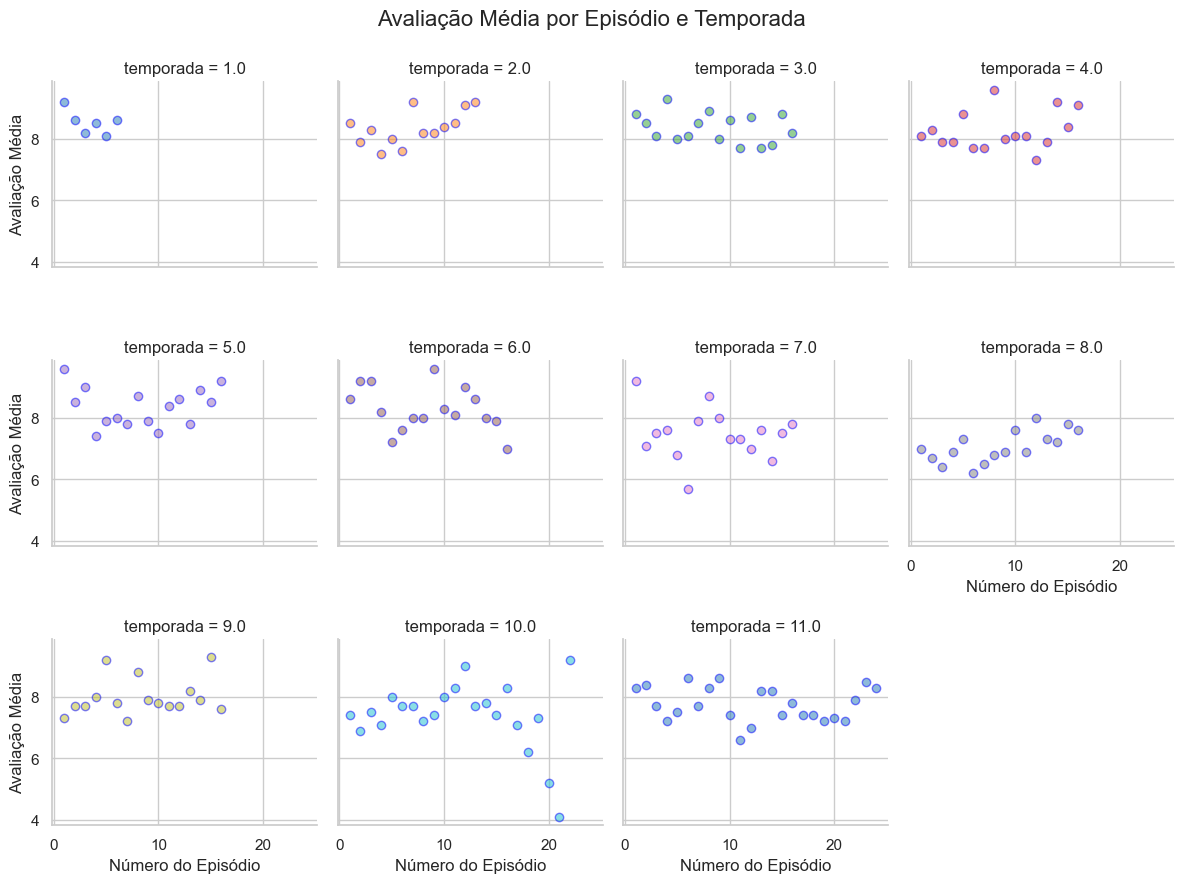

In [23]:
sns.set(style="whitegrid")
g = sns.FacetGrid(episodios, col="temporada", col_wrap=4, height=3, margin_titles=True)
g.map(plt.scatter, "num_episodio", "avaliacao_media", color="blue", alpha=0.5)
g.set_axis_labels("Número do Episódio", "Avaliação Média")
g.fig.suptitle("Avaliação Média por Episódio e Temporada", fontsize=16)

for ax, color in zip(g.axes.flat, sns.color_palette("tab10", n_colors=len(episodios['temporada'].unique()))):
    ax.collections[0].set_facecolor(color)

plt.subplots_adjust(top=0.9, hspace=0.5)
plt.show()

É notório que a série não possui um padrão em que o início das temporadas é melhor avaliado que o final, ou vice e versa, é mais como se algumas temporadas possuem um começo melhor enquanto outras possuem um final melhor avaliado. Podemos dizer então que é uma série ambígua neste quesito, afinal ela possuí temporadas cujos episódios finais são melhor avaliados, mas também ocorre o inverso em outras temporadas.

### Qual é a temporada mais regular? (com menor variação de avaliações)

In [24]:
# INSIRA SEU CÓDIGO AQUI
resultados = episodios.groupby('temporada')['avaliacao_media'].agg(['mean', 'std'])
resultados.sort_values(by='std').head(11)

,mean,std
temporada,,
1.0,8.533333,0.388158
3.0,8.356250,0.474649
8.0,7.068750,0.510841
2.0,8.353846,0.556200
11.0,7.754167,0.564130
9.0,7.987500,0.608687
4.0,8.256250,0.620719
5.0,8.356250,0.632423
6.0,8.281250,0.723159


A primeira temporada além de ser a melhor avaliada, também possui o menor desvio padrão dentre as demais, demontrando consistência na avaliação de seus episódios. O gráfico 2.3 demonstra esta regularidade nas avaliações de seus episódios.

### Qual é a temporada mais instável? (com maior variação de avaliações)

In [25]:
# INSIRA SEU CÓDIGO AQUI
resultados = episodios.groupby('temporada')['avaliacao_media'].agg(['mean', 'std'])
resultados.sort_values(by='std', ascending=False).head(1)

,mean,std
temporada,,
10.0,7.386364,1.117521


A décima temporada é a com maior variância, tendo seu variância pouco acima de 1, demonstrando possuir baixa consistência nas avaliações de seus episódios, sendo uma temporada de altos e baixos. Os Gráficos 2.3 e 4.1 apresentam a variação que esta temporada possui em relação à avaliação de seus episódios.

## 5 Valores incomuns

Existem outliers nos dados?

### 5.1 Existem episódios outliers em termos de popularidade?

Para esta análise categorizaremos outliers os episódios cujo número de votos passe a média da série somada com três vezes o desvio padrão, ou episódios cuja nota seja inferior à média da série subtraida por três vezes o desvio padrão.

In [26]:
# INSIRA SEU CÓDIGO AQUI
media = episodios['num_votos'].mean()
desvio_padrao = episodios['num_votos'].std()


limite_maximo = media + 3 * desvio_padrao
limite_minino = media - 3 * desvio_padrao

outliers = episodios[(episodios['num_votos'] > limite_maximo) | (episodios['num_votos'] < limite_minino)]

print("Outliers:")
print(outliers.to_string(index=False))


Outliers:
 id_serie       nome_serie id_episodio  temporada  num_episodio                       nome_episodio  ano               generos  duracao_minutos  avaliacao_media  num_votos
tt1520211 The Walking Dead   tt1589921        1.0           1.0                       Days Gone Bye 2010 Drama,Horror,Thriller             67.0              9.2      29347
tt1520211 The Walking Dead   tt2948638        4.0           8.0                        Too Far Gone 2013 Drama,Horror,Thriller             43.0              9.6      29536
tt1520211 The Walking Dead   tt3297776        5.0           1.0                        No Sanctuary 2014 Drama,Horror,Thriller             42.0              9.6      30449
tt1520211 The Walking Dead   tt4575388        6.0           9.0                          No Way Out 2016 Drama,Horror,Thriller             43.0              9.6      32134
tt1520211 The Walking Dead   tt4589574        6.0          16.0                   Last Day on Earth 2016 Drama,Horror,Thriller    

Se formos analisar a média de popularidade geral da série, podemos vê há sim alguns episódios outliers, além disso, é possível notar que os há apenas episódios outliers com número de votos acima da média, validando que a série possui um número de votos consistentes com a média ou acima dela, mas nunca muito abaixo dela. O Gráfico 5.1 mostra como está a distribuição de votos da série.

#### Gráfico 5.1

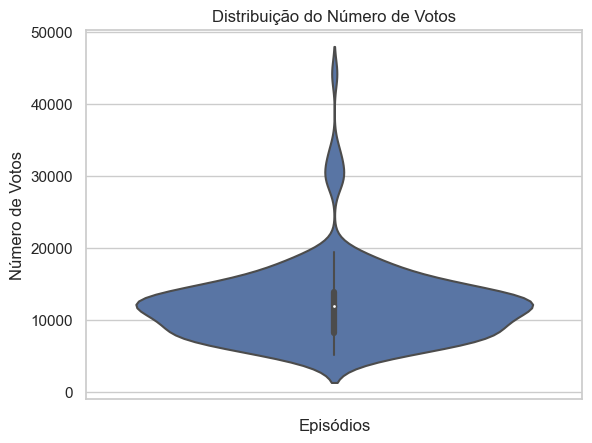

In [27]:
sns.violinplot(y=episodios['num_votos'])
plt.title('Distribuição do Número de Votos')
plt.xlabel('Episódios')
plt.ylabel('Número de Votos')
plt.show()

Agora analisaremos com base na popularidade média de suas respectivas temporadas, usando o mesmo método para categorizar um episódio como outlier e vejamos o que ocorre:

In [28]:
media_por_temporada = episodios.groupby('temporada')['num_votos'].mean()
desvio_padrao_por_temporada = episodios.groupby('temporada')['num_votos'].std()

outliers_por_temporada = {}
for temporada, media, desvio_padrao in zip(media_por_temporada.index, media_por_temporada.values, desvio_padrao_por_temporada.values):
    limite_superior = media + 3 * desvio_padrao
    limite_inferior = media - 3 * desvio_padrao
    outliers_temporada = episodios[(episodios['temporada'] == temporada) & ((episodios['num_votos'] > limite_superior) | (episodios['num_votos'] < limite_inferior))]
    if not outliers_temporada.empty:
        outliers_por_temporada[temporada] = outliers_temporada


for temporada, outliers in outliers_por_temporada.items():
    print(f"Outliers da temporada {temporada}:")
    print(outliers.to_string(index=False))
    print("\n")



Outliers da temporada 4.0:
 id_serie       nome_serie id_episodio  temporada  num_episodio nome_episodio  ano               generos  duracao_minutos  avaliacao_media  num_votos
tt1520211 The Walking Dead   tt2948638        4.0           8.0  Too Far Gone 2013 Drama,Horror,Thriller             43.0              9.6      29536


Outliers da temporada 5.0:
 id_serie       nome_serie id_episodio  temporada  num_episodio nome_episodio  ano               generos  duracao_minutos  avaliacao_media  num_votos
tt1520211 The Walking Dead   tt3297776        5.0           1.0  No Sanctuary 2014 Drama,Horror,Thriller             42.0              9.6      30449


Outliers da temporada 7.0:
 id_serie       nome_serie id_episodio  temporada  num_episodio                       nome_episodio  ano               generos  duracao_minutos  avaliacao_media  num_votos
tt1520211 The Walking Dead   tt5164772        7.0           1.0 The Day Will Come When You Won't Be 2016 Drama,Horror,Thriller             46.0

Analisando pela média de popularidade por temporada é perceptível que obtemos um número de outliers parecidos com os outliers obtidos pela média geral de popularidade da série, entretanto, a maioria dos outliers obtidos são diferentes dos que consguimos anteriormente, demonstrando que alguns episódios se encaixam na média de popularidade geral da série, mas não na média de popularidade de sua respectiva temporada. O Gráfico 5.2 exibe como fica a distribuição de votos por temporada.

#### Gráfico 5.2

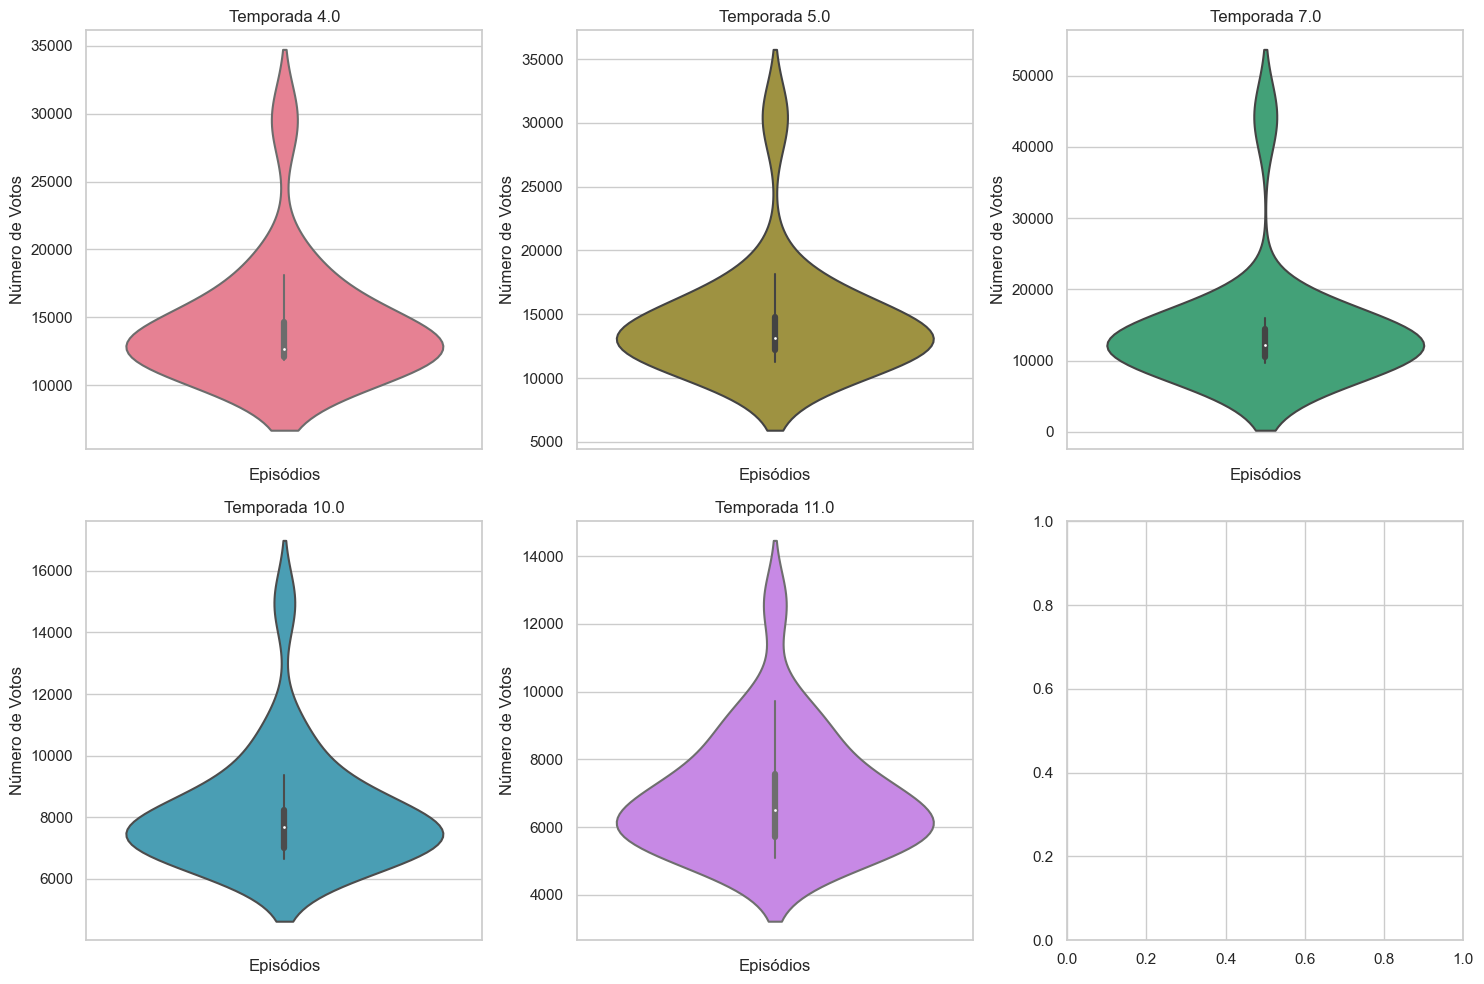

In [29]:
sns.set(style="whitegrid")

num_colunas = 3
num_linhas = -(-len(outliers_por_temporada) // num_colunas)
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 5*num_linhas))
palette = sns.color_palette("husl", n_colors=len(outliers_por_temporada))

for i, (temporada, outliers) in enumerate(outliers_por_temporada.items()):
    linha = i // num_colunas
    coluna = i % num_colunas
    ax = axs[linha, coluna] if num_linhas > 1 else axs[coluna]
    
    episodios_temporada = episodios[(episodios['temporada'] == temporada)]
    
    sns.violinplot(y='num_votos', data=episodios_temporada, ax=ax, palette=[palette[i]])
    ax.set_title(f'Temporada {temporada}')
    ax.set_xlabel('Episódios')
    ax.set_ylabel('Número de Votos')

plt.tight_layout()
plt.show()

### 5.2 Existem episódios outliers em termos de avaliação recebida?


Para esta análise categorizaremos outliers os episódios cuja avaliação passe a média da série somada com dois vezes o desvio padrão, ou episódios cuja avaliação seja inferior à média da série subtraida por dois vezes o desvio padrão.

In [30]:
# INSIRA SEU CÓDIGO AQUI
media = episodios['avaliacao_media'].mean()
desvio_padrao = episodios['avaliacao_media'].std()


limite_maximo = media + 2 * desvio_padrao
limite_minino = media - 2 * desvio_padrao

outliers = episodios[(episodios['avaliacao_media'] > limite_maximo) | (episodios['avaliacao_media'] < limite_minino)]

print("Outliers:")
print(outliers.to_string(index=False))


Outliers:
 id_serie       nome_serie id_episodio  temporada  num_episodio                nome_episodio  ano               generos  duracao_minutos  avaliacao_media  num_votos
tt1520211 The Walking Dead   tt2948638        4.0           8.0                 Too Far Gone 2013 Drama,Horror,Thriller             43.0              9.6      29536
tt1520211 The Walking Dead   tt3297776        5.0           1.0                 No Sanctuary 2014 Drama,Horror,Thriller             42.0              9.6      30449
tt1520211 The Walking Dead   tt4575388        6.0           9.0                   No Way Out 2016 Drama,Horror,Thriller             43.0              9.6      32134
tt1520211 The Walking Dead   tt5207734        7.0           6.0                        Swear 2016 Drama,Horror,Thriller             49.0              5.7      15309
tt1520211 The Walking Dead   tt6207930        8.0           6.0 The King, the Widow and Rick 2017 Drama,Horror,Thriller             45.0              6.2       9560


É fácil notar que a maioria dos outliers possuem avaliações inferior à média geral da série, demonstrando que a série deve possuir mais episódios com notas altas ou médias do que baixas. O Gráfico 5.3 retrata a distribuição das avaliações da série , que estão mais centradas na parte superior do gráfico, enquanto apenas alguns outliers aparecem na parte inferior.

#### Gráfico 5.3

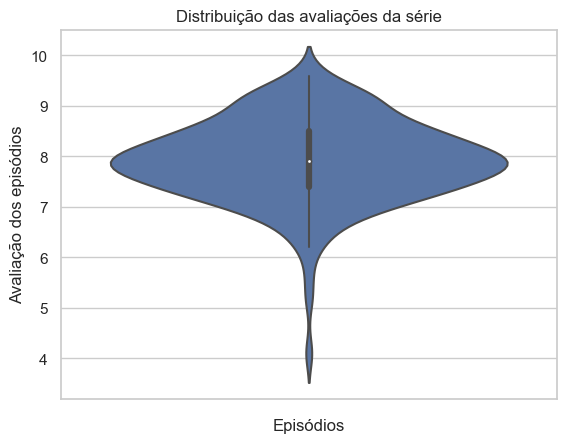

In [31]:
sns.violinplot(y=episodios['avaliacao_media'])
plt.title('Distribuição das avaliações da série')
plt.xlabel('Episódios')
plt.ylabel('Avaliação dos episódios')
plt.show()

Agora analisaremos com base nas avaliações médias de suas respectivas temporadas e vejamos quantos outiliers conseguimos encontrar desta forma.

In [32]:
# Calcule a média e o desvio padrão por temporada
media_por_temporada = episodios.groupby('temporada')['avaliacao_media'].mean()
desvio_padrao_por_temporada = episodios.groupby('temporada')['avaliacao_media'].std()

# Identifique outliers por temporada

outliers_por_temporada2 = {}
for temporada, media, desvio_padrao in zip(media_por_temporada.index, media_por_temporada.values, desvio_padrao_por_temporada.values):
    limite_superior = media + 2 * desvio_padrao
    limite_inferior = media - 2 * desvio_padrao
    outliers_temporada = episodios[(episodios['temporada'] == temporada) & ((episodios['avaliacao_media'] > limite_superior) | (episodios['avaliacao_media'] < limite_inferior))]
    if not outliers_temporada.empty:
        outliers_por_temporada2[temporada] = outliers_temporada

# Imprima os outliers por temporada, se existirem
for temporada, outliers in outliers_por_temporada2.items():
    print(f"Outliers da temporada {temporada}:")
    print(outliers.to_string(index=False))
    print("\n")


Outliers da temporada 4.0:
 id_serie       nome_serie id_episodio  temporada  num_episodio nome_episodio  ano               generos  duracao_minutos  avaliacao_media  num_votos
tt1520211 The Walking Dead   tt2948638        4.0           8.0  Too Far Gone 2013 Drama,Horror,Thriller             43.0              9.6      29536


Outliers da temporada 7.0:
 id_serie       nome_serie id_episodio  temporada  num_episodio                       nome_episodio  ano               generos  duracao_minutos  avaliacao_media  num_votos
tt1520211 The Walking Dead   tt5164772        7.0           1.0 The Day Will Come When You Won't Be 2016 Drama,Horror,Thriller             46.0              9.2      44236
tt1520211 The Walking Dead   tt5207734        7.0           6.0                               Swear 2016 Drama,Horror,Thriller             49.0              5.7      15309


Outliers da temporada 9.0:
 id_serie       nome_serie id_episodio  temporada  num_episodio   nome_episodio  ano               

É notório que há menos outliers quando analisamos desta forma e que os outliers estão perfeitamente divididos entre os acimas da média e os abaixo dela, possuindo três de cada. Também é interessante reparar na sétima temporada, pois a mesma possui dois outliers extremos, um sendo uma avaliação bem acima da média e o outro sendo muito abaixo da média da temporada, demonstrando ser uma temporada de dois extremos. O Gráfico 5.4 exprime como ficou a distribuição das avaliações por temporada.

#### Gráfico 5.4

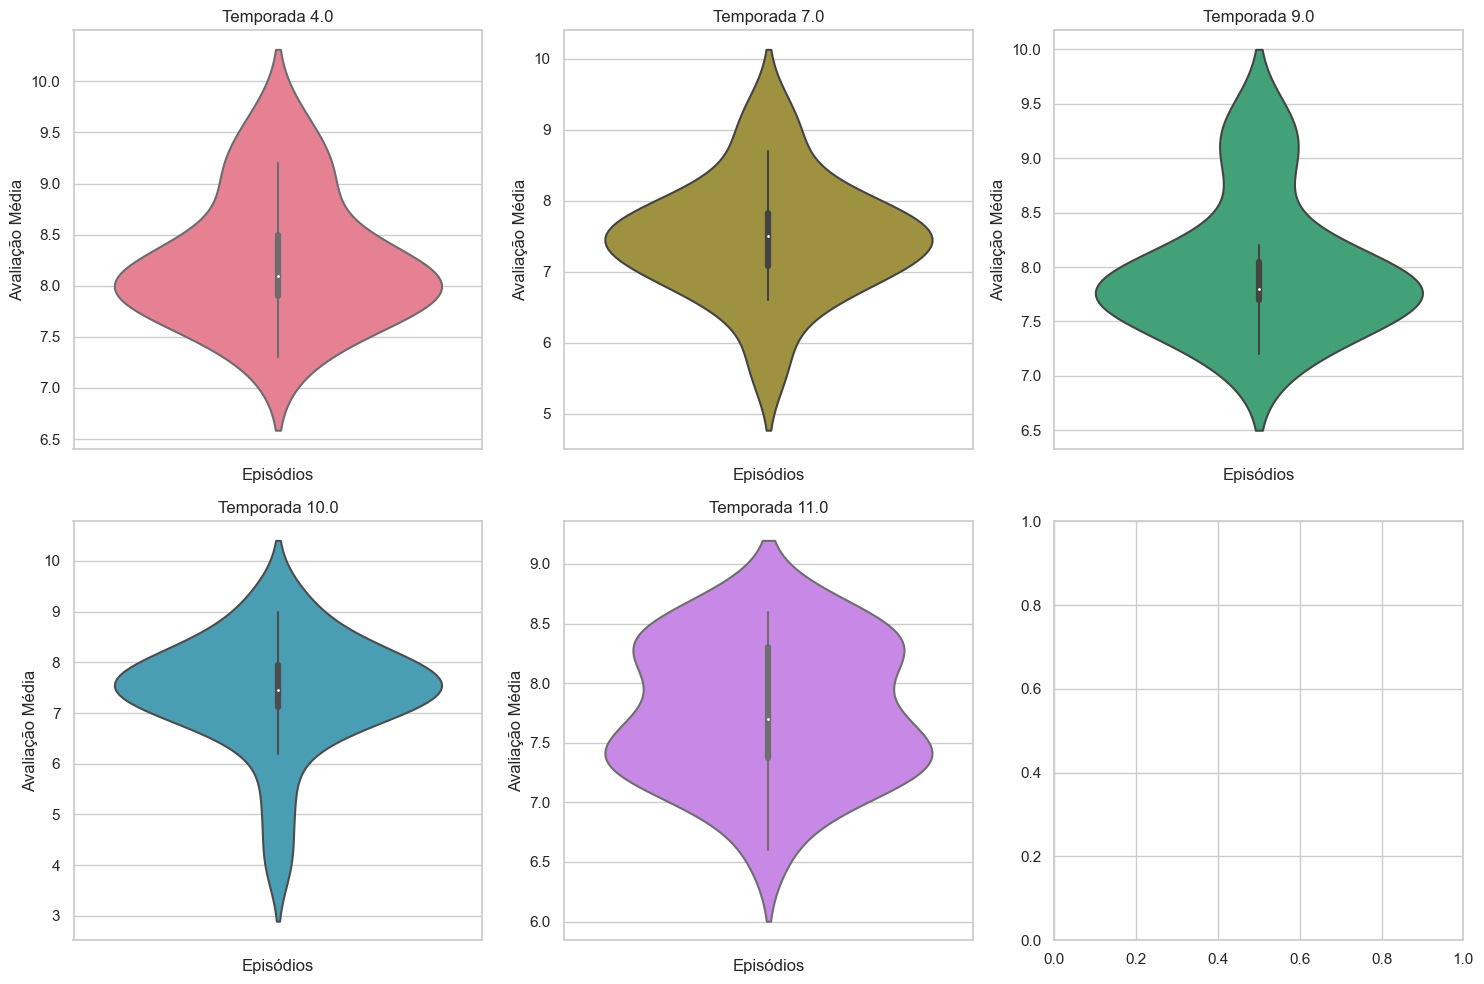

In [33]:
sns.set(style="whitegrid")

num_colunas = 3
num_linhas = -(-len(outliers_por_temporada2) // num_colunas)
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 5*num_linhas))
palette = sns.color_palette("husl", n_colors=len(outliers_por_temporada2))

for i, (temporada, outliers) in enumerate(outliers_por_temporada2.items()):
    linha = i // num_colunas
    coluna = i % num_colunas
    ax = axs[linha, coluna] if num_linhas > 1 else axs[coluna]
    
    episodios_temporada = episodios[episodios['temporada'] == temporada]
    
    sns.violinplot(y='avaliacao_media', data=episodios_temporada, ax=ax, color=palette[i])
    ax.set_title(f'Temporada {temporada}')
    ax.set_xlabel('Episódios')
    ax.set_ylabel('Avaliação Média')

plt.tight_layout()
plt.show()

## Outras análises

Fique livre para explorar outras análises, fazer novas perguntas e comparar padrões nos dados de uma série com os de outra série.